# 모델 평가
모델의 성능을 평가한다. 평가결과에 따라 프로세스를 다시 반복한다.
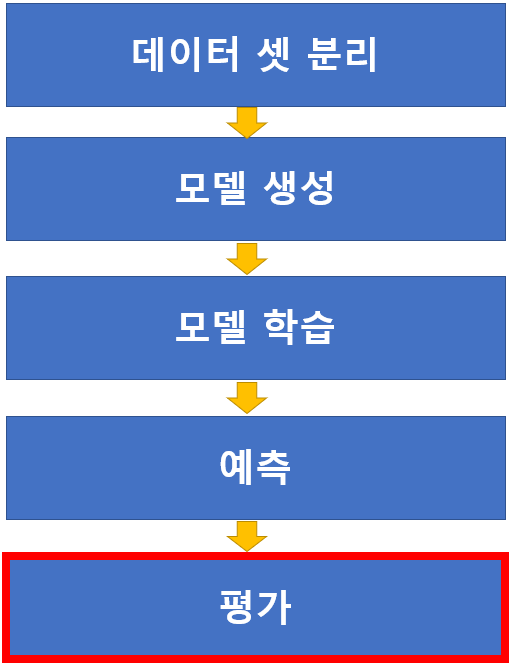

## 분류와 회귀의 평가방법
### 분류 평가 지표
1. 정확도 (Accuracy)
1. 정밀도 (Precision)
1. 재현률 (Recall)
1. F1점수 (F1 Score)
1. AUC

### 회귀 평가방법
1. MSE (Mean Squareed Error)
1. RMSE (Root Mean Squared Error)
1. $R^2$ (결정계수)

### sckit-learn 평가함수 
- sklearn.metrics 모듈을 통해 제공

# 분류(Classification) 평가 기준
## 용어
- ### 이진 분류에서 양성과 음성
    - 양성: 예측하려는(찾으려는) 대상
    - 음성: 예측하려는 대상이 아닌 것
    - 예
        - 암환자 분류 : 양성 - 암 환자, 음성 - 정상인
        - 스팸메일 분류 : 양성 - 스팸메일, 음성 - 정상메일
        - 금융사기 모델: 양성 - 사기거래, 음성 - 정상거래
        
## 정확도 (Accuracy)

$$
정확도 (Accuracy) = \cfrac{맞게 예측한 건수} {전체 예측 건수}
$$

- 전체 예측 한 것중 맞게 예측한 비율로 평가한다.
- `accuracy_score(모델예측값, 정답)`

### Accuracy 평가지표의 문제
- 불균형 데이터의 경우 정확한 평가지표가 될 수 없다.
    - 예: 양성과 음성의 비율이 1:9 인 경우 모두 음성이라고 하면 정확도는 90%가 된다.


## MNIST Data set
- 손글씨 데이터 셋
- 사이킷런 제공 image size: 8 X 8 
- https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4

In [21]:
from sklearn.datasets import load_digits

In [22]:
mnist=load_digits()

In [23]:
X=mnist.data
y=mnist.target

In [15]:
X=X.reshape(-1,8,8)

In [6]:
y.shape

(1797,)

In [9]:
from matplotlib import pyplot as plt

In [11]:
n1=X[0].reshape(8,8)

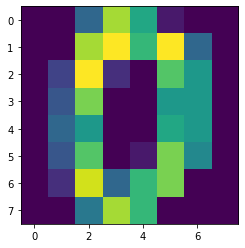

In [16]:
plt.imshow(X[0])

### 불균형 데이터셋으로 만들기
- y를 9와 나머지로 변경한다.
- Positive(양성 - 1): 9
- Negative(음성 - 0): 0 ~ 8

In [18]:
import numpy as np

In [24]:
y= y==9
np.unique(y,return_counts=True)

(array([False,  True]), array([1617,  180], dtype=int64))

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)

In [26]:
np.unique(y_train,return_counts=True)[1]/y_train.size
np.unique(y_test,return_counts=True)[1]/y_test.size

array([0.9, 0.1])

### 훈련, 테스트 데이터셋 분할

### 모델 생성 및 학습

#### Dummy Model 정의 
- Target Label중 무조건 최빈값으로 예측하는 모델을 정의한다.

In [30]:
from sklearn.dummy import DummyClassifier
model=DummyClassifier(strategy='most_frequent')
model.fit(X_train,y_train)
pred_train_dummy=model.predict(X_train)
pred_test_dummy=model.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,pred_train_dummy),accuracy_score(y_test,pred_test_dummy)

(0.8997772828507795, 0.9)

### 모델 평가

## 혼동 행렬(Confusion Marix)
- 분류의 평가지표의 기준으로 사용된다.
- 혼동행렬을 이용해 다양한 평가지표(정확도, 재현률, 정밀도, F1 점수, AUC 점수)를 계산할 수 있다.
- 함수: confusion_matrix(정답, 모델예측값)
- 결과의 0번축: 실제 class, 1번 축: 예측 class

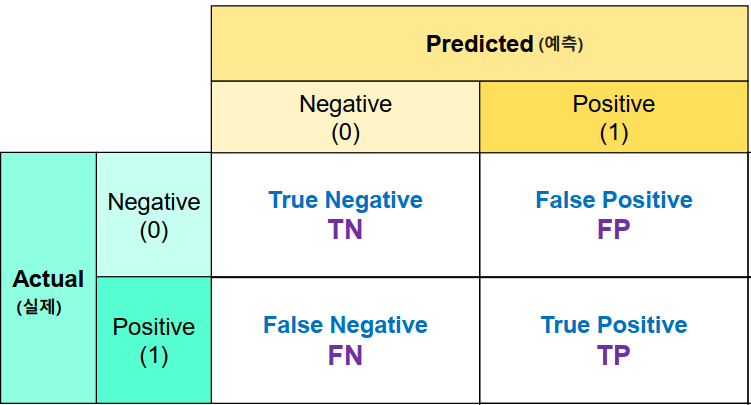

![img](https://skappal7.files.wordpress.com/2018/08/confusion-matrix.jpg?w=748)

- TP(True Positive) - 양성으로 예측했는데 맞은 개수
- TN(True Negative) - 음성으로 예측했는데 맞은 개수
- FP(False Positive) - 양성으로 예측했는데 틀린 개수 (음성을 양성으로 예측)
- FN(False Negative) - 음성으로 예측했는데 틀린 개수 (양성을 음성으로 예측)

In [32]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [34]:
cm = confusion_matrix(y_train,pred_train_dummy)
print(cm)

[[1212    0]
 [ 135    0]]


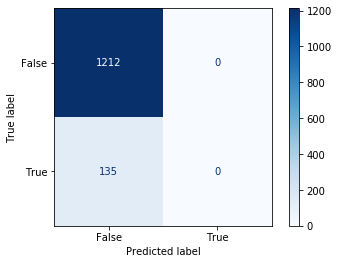

In [38]:
plot_confusion_matrix(model,X_train,y_train,cmap='Blues')

In [42]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score

## 이진 분류 평가점수
- ### Accuracy (정확도) 
    - 전체 데이터 중에 맞게 예측한 것의 비율
- ### Recall/Sensitivity(재현율/민감도) 
    - 실제 Positive(양성)인 것 중에 Positive(양성)로 예측 한 것의 비율
    - **TPR**(True Positive Rate) 이라고도 한다.
    - ex) 스팸 메일 중 스팸메일로 예측한 비율. 금융사기 데이터 중 사기로 예측한 비율
- ### Precision(정밀도) 
    - Positive(양성)으로 예측 한 것 중 실제 Positive(양성)인 비율
    - **PPV**(Positive Predictive Value) 라고도 한다.
    - ex) 스팸메일로 예측한 것 중 스팸메일의 비율. 금융 사기로 예측한 것 중 금융사기인 것의 비율

- ### F1 점수
    - 정밀도와 재현율의 조화평균 점수
    
### 기타
- ### Specificity(특이도)
    - 실제 Negative(음성)인 것들 중 Negative(음성)으로 맞게 예측 한 것의 비율
    - TNR(True Negative Rate) 라고도 한다.
- ### Fall out(위양성률)
    - 실제 Negative(음성)인 것들 중 Positive(양성)으로 잘못 예측한 것의 비율. `1 - 특이도`
    - **FPR** (False Positive Rate) 라고도 한다.
    - $ Fall-Out(FPF) = \cfrac{FP}{TN+FP}$

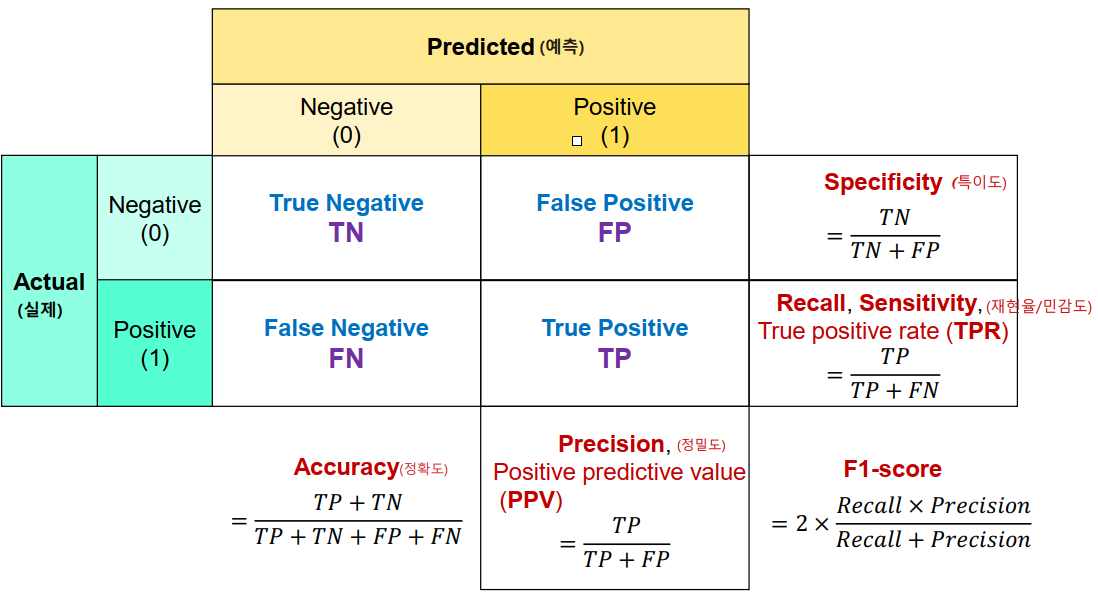

## 각 평가 지표 계산 함수
- sklearn.metrics 모듈
- ### confusion_matrix(y 실제값, y 예측값)
    - 혼돈 행렬 반환
- ### recall_score(y 실제값, y 예측값) 
  - Recall(재현율) 점수 반환 (Positive 중 Positive로 예측한 비율 (TPR))
- ### precision_score(y 실제값, y 예측값)
  - Precision(정밀도) 점수 반환 (Positive로 예측한 것 중 Positive인 것의 비율 (PPV))
- ### f1_score(y 실제값, y 예측값)
    - F1 점수 반환 (recall과 precision의 조화 평균값)
- ### classification_report(y 실제값, y 예측값)    
    - 클래스 별로 recall, precision, f1 점수와 accuracy를 종합해서 보여준다.

###   Dummy 모델 혼동행렬

### dummy 모델 Accuracy, Recall, Precision, F1-Score

### 머신러닝 모델을 이용해 학습

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf_clf=RandomForestClassifier(n_estimators=200,max_depth=3)
rf_clf.fit(X_train,y_train)
pred_train_rf=rf_clf.predict(X_train)
pred_test_rf=rf_clf.predict(X_test)

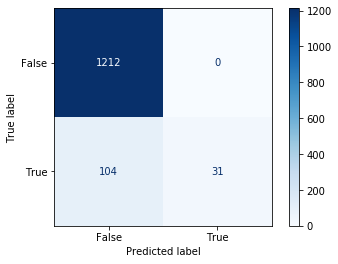

In [46]:
plot_confusion_matrix(rf_clf,X_train,y_train,cmap='Blues')

In [47]:
accuracy_score(y_train,pred_train_rf),accuracy_score(y_test,pred_test_rf)

(0.9227913882702301, 0.9266666666666666)

In [51]:
recall_score(y_train,pred_train_rf),recall_score(y_test,pred_test_rf)

(0.22962962962962963, 0.26666666666666666)

In [52]:
precision_score(y_train,pred_train_rf),precision_score(y_test,pred_test_rf)

(1.0, 1.0)

In [53]:
f1_score(y_train,pred_train_rf),f1_score(y_test,pred_test_rf)

(0.37349397590361444, 0.4210526315789474)

### classification_report()


In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test,pred_test_rf))

              precision    recall  f1-score   support

       False       0.92      1.00      0.96       405
        True       1.00      0.27      0.42        45

    accuracy                           0.93       450
   macro avg       0.96      0.63      0.69       450
weighted avg       0.93      0.93      0.91       450



## 재현율과 정밀도의 관계

**이진 분류의 경우 Precision(정밀도)가 중요한 경우와 Recall(재현율) 중요한 업무가 있다.**

#### 재현율이 더 중요한 경우
- 실제 Positive 데이터를 Negative 로 잘못 판단하면 업무상 큰 영향이 있는 경우. 
- FN(False Negative)를 낮추는데 촛점을 맞춘다.
- 암환자 판정 모델, 보험사기적발 모델


#### 정밀도가 더 중요한 경우
- 실제 Negative 데이터를 Positive 로 잘못 판단하면 업무상 큰 영향이 있는 경우.
- FP(False Positive)를 낮추는데 초점을 맞춘다.
- 스팸메일 판정


## 임계값(Threshold) 변경을 통한 재현율, 정밀도 변환
- 임계값 : 모델이 분류의 답을 결정할 때 기준값
- 정밀도나 재현율을 특히 강조해야 하는 상황일 경우 임계값 변경을 통해 평가 수치를 올릴 수있다.
- 단 극단적으로 임계점을 올리나가 낮춰서 한쪽의 점수를 높이면 안된다. (ex: 암환자 예측시 재현율을 너무 높이면 정밀도가 낮아져 걸핏하면 정상인을 암환자로 예측하게 된다.)
    
### 임계값 변경에 따른  정밀도와 재현율 변화관계
- 임계값을 높이면 양성으로 예측하는 기준을 높여서(엄격히 해서) 음성으로 예측되는 샘플이 많아 진다. 그래서 정밀도는 높아지고 재현율은 낮아진다.
- 임계값을 낮추면 양성으로 예측하는 기준이 낮아져서 양성으로 예측되는 샘플이 많아 진다. 그래서 재현율은 높아지고 정밀도는 낮아진다.
- 임계값을 변화시켰을때 **재현율과 정밀도는 음의 상관관계를 가진다.**
- 임계값을 변화시켰을때 재현율과 위양성율(Fall-Out/FPR)은 양의 상관관계를 가진다.


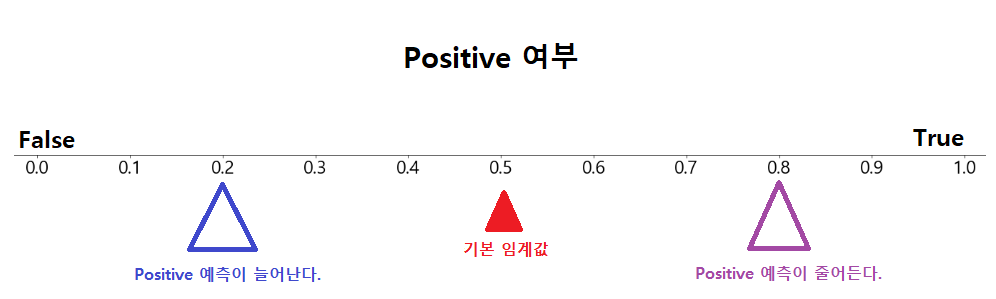

In [56]:
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train,y_train)
pred_train = tree_clf.predict(X_train)
pred_test = tree_clf.predict(X_test)


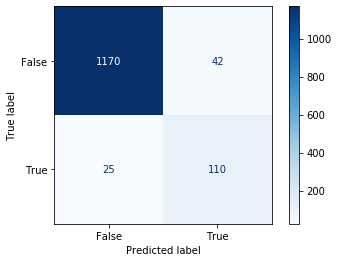

In [62]:
plot_confusion_matrix(tree_clf,X_train,y_train, cmap="Blues")

In [57]:
accuracy_score(y_train,pred_train),accuracy_score(y_test,pred_test)

(0.9502598366740905, 0.94)

In [58]:
recall_score(y_train,pred_train),recall_score(y_test,pred_test)

(0.8148148148148148, 0.8222222222222222)

In [59]:
precision_score(y_train,pred_train),precision_score(y_test,pred_test)

(0.7236842105263158, 0.6607142857142857)

In [70]:
a=tree_clf.predict_proba(X_test)

In [77]:
binarizer1=Binarizer(threshold=0.7)
pred_test=binarizer1.fit_transform(a)[:,1]

In [78]:
precision_score(y_test,pred_test),recall_score(y_test,pred_test)

(0.7391304347826086, 0.7555555555555555)

### Binarizer - 임계값 변경
- Transformer로 양성 여부를 선택하는 임계값을 변경할 수 있다.

In [64]:
from sklearn.preprocessing import Binarizer

In [65]:
exam=[[0.3,0.4,0.5,0.6,0.7]]

In [66]:
b=Binarizer(threshold=0.5)
b.fit_transform(exam)

array([[0., 0., 0., 1., 1.]])

In [83]:
def print_evaluation(y,predict_proba,threshold_list):
    """
    임계값(threshold)의 변화에 따른 평가 지표 출력
    [매개변수]
        y:실제 y(target)값
        predict_proba: 모델이 예측한 확률
        threshold_list: 확인한 임계값 리스트
    """
    for th in threshold_list:
        binarizer =Binarizer(threshold=th)
        pred=binarizer.fit_transform(predict_proba)[:,1]
        acc =accuracy_score(y,pred)
        recall=recall_score(y,pred)
        precision=precision_score(y,pred)
        f1=f1_score(y,pred)
        print(f"Threshold:{th}")
        print(f"accuracy:{acc},recall:{recall},precision:{precision},f1:{f1}")
        print("="*50)

In [84]:
threshold_list=np.arange(0,1.1,0.1)
pred_proba=tree_clf.predict_proba(X_test)
print_evaluation(y_test,pred_proba,threshold_list)

Threshold:0.0
accuracy:0.22,recall:1.0,precision:0.11363636363636363,f1:0.20408163265306123
Threshold:0.1
accuracy:0.9,recall:0.8666666666666667,precision:0.5,f1:0.6341463414634146
Threshold:0.2
accuracy:0.94,recall:0.8222222222222222,precision:0.6607142857142857,f1:0.7326732673267325
Threshold:0.30000000000000004
accuracy:0.94,recall:0.8222222222222222,precision:0.6607142857142857,f1:0.7326732673267325
Threshold:0.4
accuracy:0.94,recall:0.8222222222222222,precision:0.6607142857142857,f1:0.7326732673267325
Threshold:0.5
accuracy:0.94,recall:0.8222222222222222,precision:0.6607142857142857,f1:0.7326732673267325
Threshold:0.6000000000000001
accuracy:0.9488888888888889,recall:0.7555555555555555,precision:0.7391304347826086,f1:0.7472527472527473
Threshold:0.7000000000000001
accuracy:0.9488888888888889,recall:0.7555555555555555,precision:0.7391304347826086,f1:0.7472527472527473
Threshold:0.8
accuracy:0.9,recall:0.0,precision:0.0,f1:0.0
Threshold:0.9
accuracy:0.9,recall:0.0,precision:0.0,f1:0

C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_test,pred_proba[:,1])

In [87]:
import pandas as pd
d={
    '임계값':threshold,
    '정밀도':precision[:-1],
    '재현율':recall[:-1]
}
metrics=pd.DataFrame(d)
metrics

C:\Users\Playdata\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,임계값,정밀도,재현율
0,0.012009,0.113636,1.000000
1,0.027778,0.416667,0.888889
2,0.060000,0.434783,0.888889
3,0.153846,0.500000,0.866667
4,0.181818,0.513889,0.822222
5,0.600000,0.660714,0.822222
6,0.742424,0.739130,0.755556


## ROC 곡선과 AUC
이진 분류 모델 성능 측정에서 중요하게 사용되는 지표.
- **FPR(False Positive Rate)**
    - 위양성율 (fall-out)
    - 1-특이도(TNR)
    - 실제 음성중 양성으로 잘못 예측 한 비율
    $$
    \cfrac{FR}{TN+FP}
    $$
- **TPR(True Positive Rate)** 
    - 재현율(recall)
    - 실제 양성중 양성으로 맞게 예측한 비율
    $$
    \frac{TP}{FN+TP}
    $$
- **ROC 곡선**
    - FPR을 X축, TPR을 Y축으로 놓고 임계값을 변경해서 FPR이 변할 때 TPR이 어떻게 변하는지 나타내는 곡선.
- **AUC**
    - ROC 곡선 아래쪽 면적
    - 0 ~ 1 사이 실수로 나오며 클수록 좋다.
   - **AUC 점수기준**
        - 1.0 ~ 0.9 : 아주 좋음
        - 0.9 ~ 0.8 : 좋음
        - 0.8 ~ 0.7 : 괜찮은 모델
        - 0.7 ~ 0.6 : 의미는 있으나 좋은 모델은 아님
        - 0.6 ~ 0.5 : 좋지 않은 모델

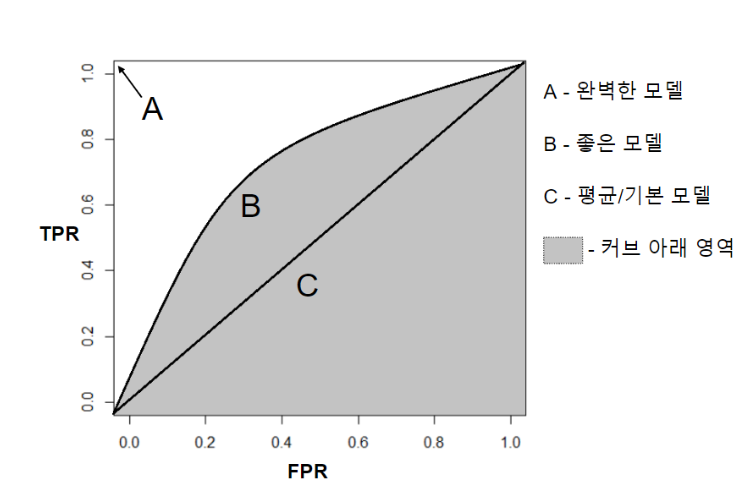

### ROC, ACU  확인
- roc_curve(y값, 예측확률) : FPR, TPR, Thresholds (임계치)
- roc_auc_score(y값, 예측확률) : AUC 점수 반환

In [94]:
import matplotlib.pyplot as plot
from sklearn.metrics import roc_curve, roc_auc_score
pred_proba_tree = tree_clf.predict_proba(X_test)[:,1]
pred_proba_rf = rf_clf.predict_proba(X_test)[:,1]
fpr1, tpr1, th1 =roc_curve(y_test,pred_proba_tree)
fpr2, tpr2, th2 =roc_curve(y_test,pred_proba_rf)


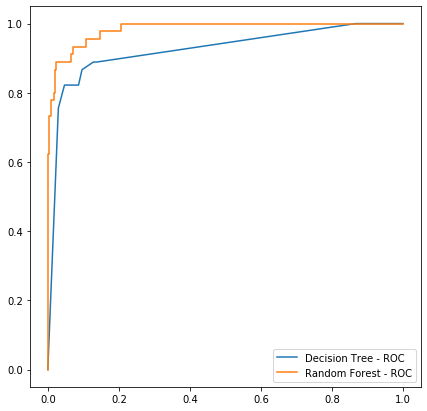

In [96]:
plt.figure(figsize=(7,7))
plt.plot(fpr1,tpr1,label='Decision Tree - ROC')
plt.plot(fpr2,tpr2,label='Random Forest - ROC')
plt.legend()
plt.show()

In [98]:
print("Decision Tree - AUC,Random Forest - AUC")
roc_auc_score(y_test,pred_proba_tree),roc_auc_score(y_test,pred_proba_rf)

Decision Tree - AUC,Random Forest - AUC


(0.9238683127572015, 0.983758573388203)